In [4]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0408 01:20:50.471127 139834475881856 deprecation.py:323] From <ipython-input-4-2f7a547f03eb>:5: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0408 01:20:50.476102 139834475881856 deprecation.py:323] From /home/george/anaconda2/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0408 01:20:50.492547 139834475881856 deprecation.py:323] From /home/george/anaconda2/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a fut

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0408 01:20:51.052802 139834475881856 deprecation.py:323] From /home/george/anaconda2/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0408 01:20:51.105266 139834475881856 deprecation.py:323] From /home/george/anaconda2/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0408 01:20:51.370820 139834475881856 deprecation.py:323] From /home/george/anaconda2/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: __init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
#parâmetros gerais
learning_rate = 0.001
epochs = 40
batch_size = 1000

In [14]:
#parametros da rede neural
n_entrada = 784
n_camada_1 = 50
n_camada_2 = 50
n_classes = 10

In [15]:
#variáveis preditoras e target (em forma de placeholders)
x = tf.placeholder(tf.float32, [None, n_entrada])
y = tf.placeholder(tf.float32, [None, n_classes])

In [16]:
print(float((2/784)**(1/2))) #inicialização dos pesos chavier

1.0


In [17]:
#Pesos da camada 1
w1 = tf.Variable(tf.random_normal([n_entrada, n_camada_1], stddev=0.05))
#Bias da camada 1
b1 = tf.Variable(tf.zeros([n_camada_1]))
#camada 1
layer_1 = tf.nn.relu(tf.add(tf.matmul(x,w1),b1))
#dropout 1
drop1 = tf.nn.dropout(layer_1, rate=0.2)

#Pesos da camada 2
w2 = tf.Variable(tf.random_normal([n_camada_1, n_camada_2], stddev=0.25))
#Bias da camada 2
b2 = tf.Variable(tf.zeros([n_camada_2]))
#camada 2
layer_2 = tf.nn.relu(tf.add(tf.matmul(drop1,w2),b2))
#dropout 2
drop2 = tf.nn.dropout(layer_2, rate=0.2)

#pesos da camada de saída
w_out = tf.Variable(tf.random_normal([n_camada_2, n_classes], stddev=0.25))
#Bias da saída
bias_out = tf.Variable(tf.zeros([n_classes]))
#Camada de saída
saida = tf.matmul(drop2, w_out) + bias_out

In [18]:
#Função de Custo
custo = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = saida, labels = y))

#otimizador
otimizador = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(custo)

In [19]:
#Testando o modelo 
predicoes = tf.equal(tf.argmax(saida,1), tf.argmax(y, 1))

#Calculando a acurácia
acuracia = tf.reduce_mean(tf.cast(predicoes, tf.float32))

<b>Agora eu inicio as variáveis e tudo que eu defini, além de executar o treinamento da rede... </b>

In [21]:
#Listas que armazenam os valores ao longo do treinamento
historico_acc=[]
historico_epochs=[]

#iniciando as variáveis
init = tf.global_variables_initializer()

#abrindo a sessão
with tf.Session() as sess:
    sess.run(init)
    #cliclo de treinamento - epochs
    for epoch in range(epochs):
        custo_medio = 0.0
        total_batches = int(mnist.train.num_examples / batch_size)
        
        #loop para os batchs
        for i in range(total_batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            #fit training usando batch data
            sess.run(otimizador, feed_dict={x: batch_x, y: batch_y})
            
            #computanbdo o custo médio de uma epoch completa: Soma tudo e divide pela quantidade de batchs
            custo_medio += sess.run(custo, feed_dict={x: batch_x, y: batch_y}) / total_batches
            
        #calculando a acurácia em cada época
        acuracia_teste = sess.run(acuracia, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        
        #mostrando resultados após cada época
        print("Epoch: ", "{},".format((epoch + 1)), "Custo medio de treino = ", "{:.3f}". format(custo_medio))
        print("Acc test = ", "{:.3f}".format(acuracia_teste))
        historico_acc.append(acuracia_teste)
        historico_epochs.append(epoch+1)
        
        
    print ("Treinamento concluído!")
    print("Acc do Modelo:", acuracia.eval({x: mnist.test.images, y: mnist.test.labels}))
            

('Epoch: ', '1,', 'Custo medio de treino = ', '1.272')
('Acc test = ', '0.782')
('Epoch: ', '2,', 'Custo medio de treino = ', '0.577')
('Acc test = ', '0.856')
('Epoch: ', '3,', 'Custo medio de treino = ', '0.443')
('Acc test = ', '0.881')
('Epoch: ', '4,', 'Custo medio de treino = ', '0.377')
('Acc test = ', '0.896')
('Epoch: ', '5,', 'Custo medio de treino = ', '0.338')
('Acc test = ', '0.907')
('Epoch: ', '6,', 'Custo medio de treino = ', '0.312')
('Acc test = ', '0.911')
('Epoch: ', '7,', 'Custo medio de treino = ', '0.283')
('Acc test = ', '0.918')
('Epoch: ', '8,', 'Custo medio de treino = ', '0.265')
('Acc test = ', '0.923')
('Epoch: ', '9,', 'Custo medio de treino = ', '0.249')
('Acc test = ', '0.927')
('Epoch: ', '10,', 'Custo medio de treino = ', '0.233')
('Acc test = ', '0.928')
('Epoch: ', '11,', 'Custo medio de treino = ', '0.225')
('Acc test = ', '0.929')
('Epoch: ', '12,', 'Custo medio de treino = ', '0.215')
('Acc test = ', '0.933')
('Epoch: ', '13,', 'Custo medio de tr

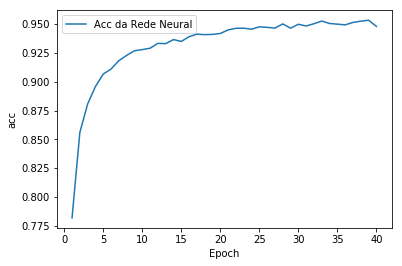

In [23]:
import matplotlib.pyplot as plt
plt.plot(historico_epochs, historico_acc, '-', label = 'Acc da Rede Neural')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()